Some basic models will be experimented with here

Imports:

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from src.data import data_loader
import matplotlib.pyplot as plt

Load the housing data. It is helpful to view the data format from a few entries as well.

In [12]:
df = data_loader.load_house_csv()
X = df.drop('price', axis=1)
y = df['price']
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"{df.head()}")

X shape: (4308, 6)
y shape: (4308,)
   bedroom_count    net_sqm  center_distance  metro_distance  floor  age  \
0              1  26.184098          1286.68      204.003817     22   67   
1              1  34.866901          1855.25      186.980360      8   30   
2              1  36.980709           692.09      111.224999     24   24   
3              1  17.445723          1399.49      237.998760      1   66   
4              1  52.587646            84.65      100.996400     20    3   

          price  
0  96004.804557  
1  92473.722568  
2  98112.519942  
3  92118.326874  
4  98976.653176  


Perform Z-score scaling. This improves model performance.

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Some entries after scaling: {X_scaled}")

Some entries after scaling: [[-1.10341241 -0.9716999   0.3532313  ...  1.67676796  0.66706472
   0.07746358]
 [-1.10341241 -0.88074118  1.37719952 ... -0.18588891 -0.6726287
  -0.82346766]
 [-1.10341241 -0.85859749 -0.71759773 ...  1.94286179 -0.88987628
   0.61523264]
 ...
 [ 0.5116392   1.89215448  0.89115815 ... -0.8511235  -1.57782696
  -0.48412909]
 [-1.10341241 -0.94016994  1.4510026  ... -0.71807658 -1.68645075
  -0.71094787]
 [-0.69964951 -0.67572406 -1.50434433 ...  1.14458028 -1.75886661
  -0.4996082 ]]


An 80-20 split will be used between training and testing

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

Various polynomial models are evaluated from degrees 1 through 6. Their Train and Test MSEs are computed.

In [49]:
from sklearn.preprocessing import PolynomialFeatures

train_errors = []
test_errors = []

for degree in range(1, 6):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit linear regression on polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict and evaluate
    preds_train = model.predict(X_train_poly)
    mse_train = mean_squared_error(y_train, preds_train)
    preds_test = model.predict(X_test_poly)
    mse_test = mean_squared_error(y_test, preds_test)
    print(f'Degree {degree}:  Train MSE = {mse_train:.4f}, Test MSE = {mse_test:.4f}')

    train_errors.append(mse_train)
    test_errors.append(mse_test)

Degree 1:  Train MSE = 4388425.2200, Test MSE = 4028777.9853
Degree 2:  Train MSE = 4118548.3574, Test MSE = 3935593.4393
Degree 3:  Train MSE = 3819331.4706, Test MSE = 4029457.6299
Degree 4:  Train MSE = 3561428.0694, Test MSE = 4750884.8327
Degree 5:  Train MSE = 3064711.7070, Test MSE = 12874189.8102


The train and test MSEs are plotted below.

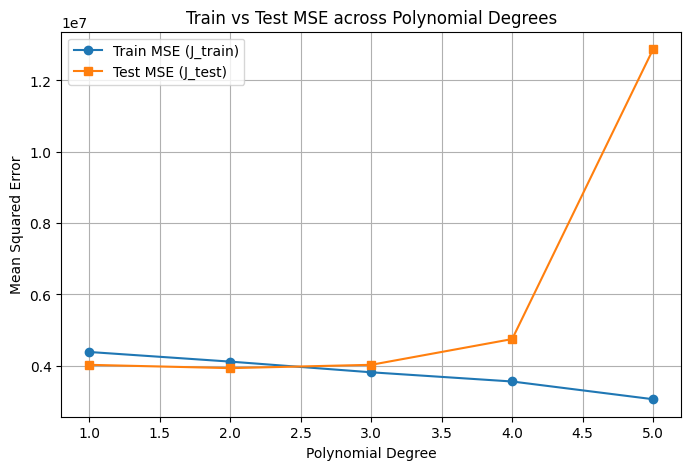

In [39]:
degrees = range(1, 6)

plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, label="Train MSE (J_train)", marker='o')
plt.plot(degrees, test_errors, label="Test MSE (J_test)", marker='s')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE across Polynomial Degrees")
plt.legend()
plt.grid(True)
plt.show()

Based on the difference between Train and Test MSE's, degree = 3 performs best among these polynomial models. 4th degree or above show significant jumps in Test MSE, which is a sign of overfitting.

Recall from above that housing prices from this data hover around 100000 dollars. The MSE may seem off to some since it is in the millions.
For more interpretable results, it's useful to report the RMSE of these models, since MSE is akin to reporting errors in "dollars squared".

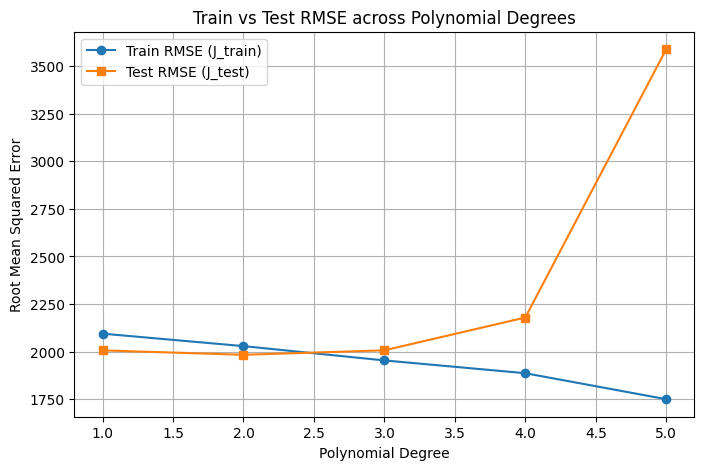

In [50]:
import numpy as np

plt.figure(figsize=(8, 5))
plt.plot(degrees, np.sqrt(train_errors), label="Train RMSE (J_train)", marker='o')
plt.plot(degrees, np.sqrt(test_errors), label="Test RMSE (J_test)", marker='s')
plt.xlabel("Polynomial Degree")
plt.ylabel("Root Mean Squared Error")
plt.title("Train vs Test RMSE across Polynomial Degrees")
plt.legend()
plt.grid(True)
plt.show()


For a 3rd degree model, the RMSE is around 2000.
This tells us that, on average, this model's price predictions are 2000 dollars off from the actual sale prices.

Next, we will explore using neural networks.